# Assignment 2

In this assignment your goal is to predict the credit application result (not granted / granted) based on multiple features. You'll have to do everything on your own this time, no hints.

The dataset contains 15 features (named A1 - A15) and one target variable (T). We don't know what the features are, we only know what values they take:

* A1: b, a.
* A2: continuous
* A3: continuous
* A4: u, y, l, t
* A5: g, p, gg
* A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff
* A7: v, h, bb, j, n, z, dd, ff, o
* A8: continuous
* A9: t, f
* A10: t, f
* A11: continuous
* A12: t, f
* A13: g, p, s
* A14: continuous
* A15: continuous
* T: +, -

There are 6 features that are continous, 3 true/false variables and 6 categorical variables that take different values each.

From the basic diagnostic of the data, you can see it's a real mess. There are different data types, missing observations etc.

Your task is to build three different classifiers (and one additional GridSearched) that correctly (as much as possible) predict the credit application decision (this is the target variable 'T'). To achieve this, you'll have to do the following:

1. Clean up the dataset - when you read it now, you'll notice that the data is not correctly parsed. The columns that contain numbers are read as 'object' type columns. This is because the missing values in the data set are marked with ?'s.
Deal with it by correctly recognizing ?'s as missing values and dropping them from the dataset.
2. Encode the features - there are a lot of categorical features with char values. You'll need to use [LabelEncoder and OneHotEncoder](https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621) for them. Also, see if you need to use OneHotEncoder for all of them - for example by checking the correlations between a LabelEncoded feature and the target variable before and after OneHot Encoding. (OneHot encoding doesn't make any sense if your variable actually represents some incremental, hieraarchical relationship - and we don't know it for our dataset).
3. This brings us to the next point - take a look into the data set: plot the histograms, check the skewness, correlations etc. ([also check this](https://seaborn.pydata.org/generated/seaborn.pairplot.html))
4. Train at least 3 diffeent classifiers using cross-validation. There must be at least one *simple* and one ensemble classifier. Compare those classifiers' precissions, recalls, ROC's etc. **Don't forget to use cross-validation.**
5. For one selected classifier run Grid Search and, once the best parameter combination is found, compare it's performance metrics with those of classifiers from point 4.

Scoring:
1. Clean-up: 1 point
2. Encoding: 1 point
3. Data exploration: 2 points (1 point for corellations, histograms, etc., 1 for extras such as attempts at dimensionality reduction or non-linear correlations)
4. Training the 3 classifiers: 1 point for each (3 points total), 1 point for meaningful comparison.
5. Grid Search: 1 point for setting up and training, 1 point for comparing with previous classifiers.


In [1]:
from pandas import read_csv
import numpy as np

column_names = [f"A{i}" for i in range(1, 16)]
column_names.append('T')

data = read_csv('data.csv', names=column_names)

In [2]:
print(data.dtypes)

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
T       object
dtype: object


In [3]:
print(data.head(20))

   A1     A2      A3 A4 A5  A6 A7     A8 A9 A10  A11 A12 A13    A14    A15  T
0   b  30.83   0.000  u  g   w  v  1.250  t   t    1   f   g  00202      0  +
1   a  58.67   4.460  u  g   q  h  3.040  t   t    6   f   g  00043    560  +
2   a  24.50   0.500  u  g   q  h  1.500  t   f    0   f   g  00280    824  +
3   b  27.83   1.540  u  g   w  v  3.750  t   t    5   t   g  00100      3  +
4   b  20.17   5.625  u  g   w  v  1.710  t   f    0   f   s  00120      0  +
5   b  32.08   4.000  u  g   m  v  2.500  t   f    0   t   g  00360      0  +
6   b  33.17   1.040  u  g   r  h  6.500  t   f    0   t   g  00164  31285  +
7   a  22.92  11.585  u  g  cc  v  0.040  t   f    0   f   g  00080   1349  +
8   b  54.42   0.500  y  p   k  h  3.960  t   f    0   f   g  00180    314  +
9   b  42.50   4.915  y  p   w  v  3.165  t   f    0   t   g  00052   1442  +
10  b  22.08   0.830  u  g   c  h  2.165  f   f    0   t   g  00128      0  +
11  b  29.92   1.835  u  g   c  h  4.335  t   f    0   f   g  00

In [4]:
# missing values - why is it 0 everywhere?
print(data.isnull().sum())

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
T      0
dtype: int64


In [5]:
for column in data: # looping trough each column of the dataframe
    data = data.loc[data[column] != "?"] #removing all rows with a question mark
    
# changing the datatypes of the A2 and A14
data ["A2"] = data["A2"].astype(np.float64)
data["A14"] = data["A14"].astype(np.int64)


In [6]:
print(data.dtypes)
    

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14      int64
A15      int64
T       object
dtype: object


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

onehotencoder = OneHotEncoder(sparse=False)
labelencoder = LabelEncoder()

data_copy = data

In [8]:
data_copy["A1"] = labelencoder.fit_transform(data_copy["A1"]) # remain
data_copy = pd.get_dummies(data_copy, columns=['A4'])
data_copy = pd.get_dummies(data_copy, columns=['A5'])
data_copy = pd.get_dummies(data_copy, columns=['A6'])
data_copy = pd.get_dummies(data_copy, columns=['A7'])
data_copy["A9"] = labelencoder.fit_transform(data_copy["A9"]) # remain
data_copy["A10"] = labelencoder.fit_transform(data_copy["A10"]) # remain
data_copy["A12"] = labelencoder.fit_transform(data_copy["A12"]) # remain
data_copy = pd.get_dummies(data_copy, columns=['A13'])
data_copy["T"] = labelencoder.fit_transform(data_copy["T"]) # remain
data["A1"] = labelencoder.fit_transform(data["A1"]) # remain
data["A4"] = labelencoder.fit_transform(data["A4"])
data["A5"] = labelencoder.fit_transform(data["A5"])
data["A6"] = labelencoder.fit_transform(data["A6"])
data["A7"] = labelencoder.fit_transform(data["A7"])
data["A9"] = labelencoder.fit_transform(data["A9"]) # remain
data["A10"] = labelencoder.fit_transform(data["A10"]) # remain
data["A12"] = labelencoder.fit_transform(data["A12"]) # remain
data["A13"] = labelencoder.fit_transform(data["A13"])
data["T"] = labelencoder.fit_transform(data["T"]) # remain



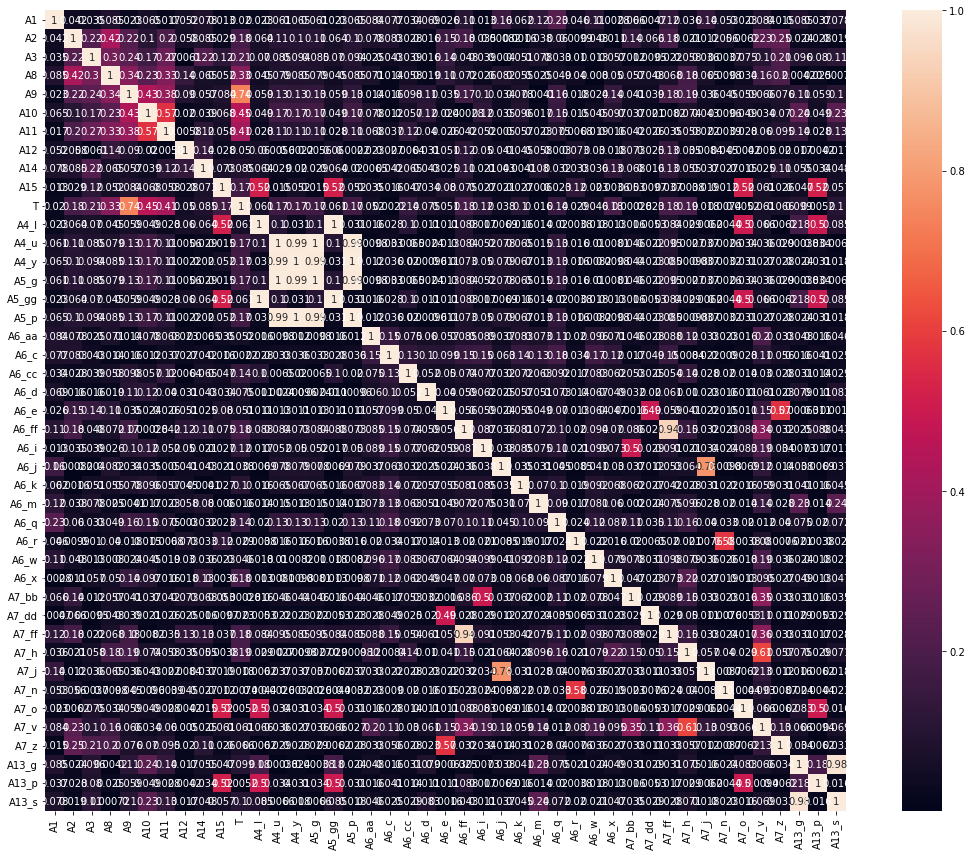

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = data_copy.corr().abs()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, square=True, annot=True)
plt.tight_layout()

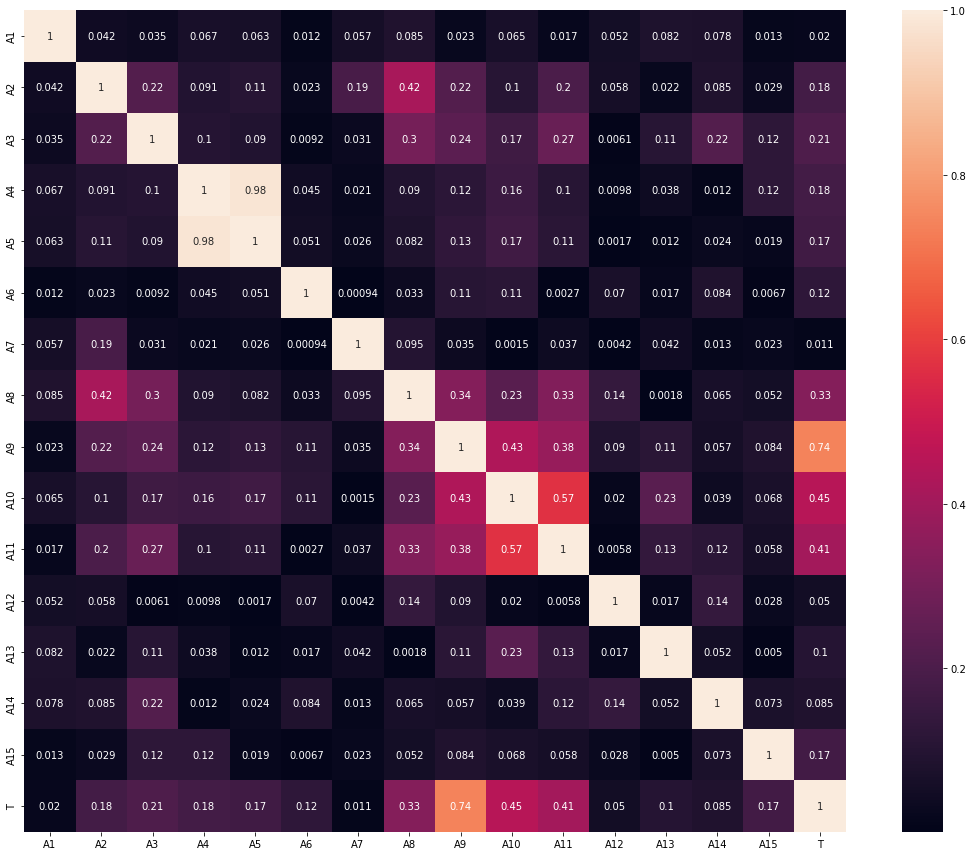

In [10]:
#every feature that consisted of more then 2 state has been onshot encoded. The resulting correlations is still low so onshot encoding is not an option.
corr = data.corr().abs()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, square=True, annot=True)
plt.tight_layout()

c:\users\jelmer\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\jelmer\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\jelmer\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

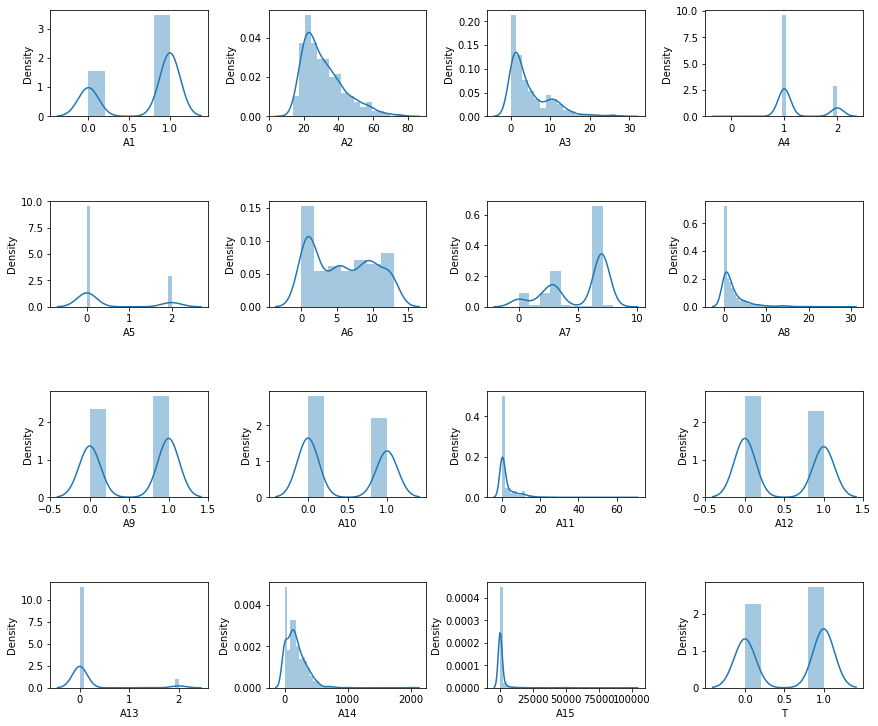

In [11]:
#Only A8, A9, A10 and A11 have a high enough correlation.
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(12, 10))
index = 0
axs = axs.flatten()
for k, v in data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


c:\users\jelmer\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\jelmer\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='A8', ylabel='Density'>

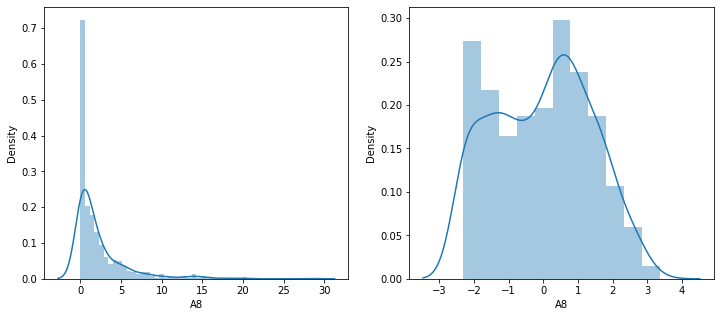

In [12]:
#fixing a8
new_data = data.assign(A8 = lambda x: np.log(x.A8+0.1)) # added a small number to x to fix log(0)
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))
axs.flatten()

#A8 still has some outliers but looks better then before
sns.distplot(data['A8'], ax = axs[0])
sns.distplot(new_data['A8'], ax = axs[1])

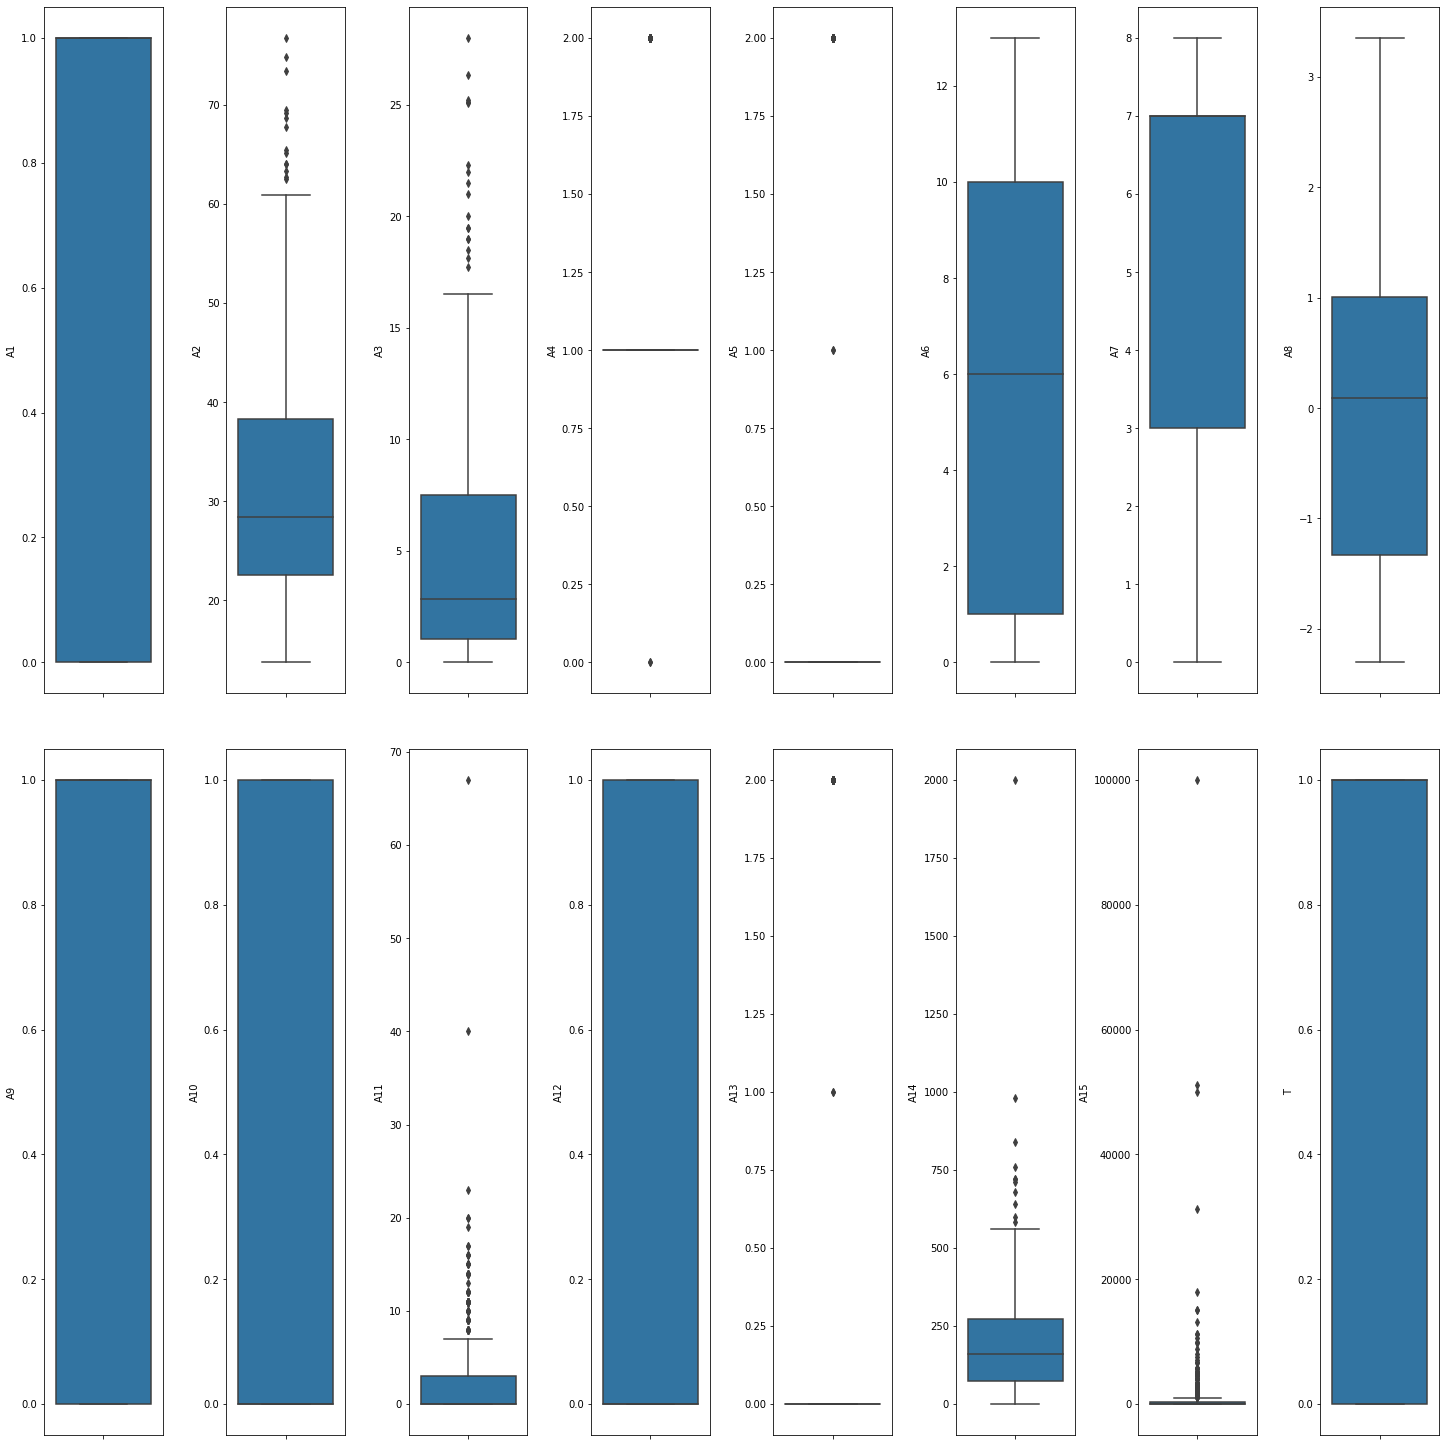

In [13]:
fig, axs = plt.subplots(ncols=8, nrows=2, figsize=(20, 20))
index = 0
axs = axs.flatten()
for k, v in new_data.items():
    sns.boxplot(y=k, data=new_data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

c:\users\jelmer\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='A8', ylabel='Density'>

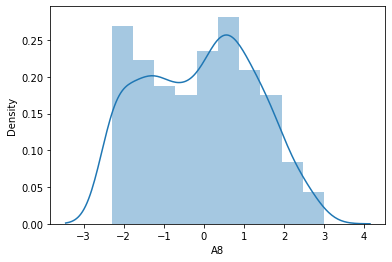

In [14]:
#removing outliers
new_data=new_data.loc[(new_data.A11 < 11)]

# A8 is even better now
sns.distplot(new_data['A8'])


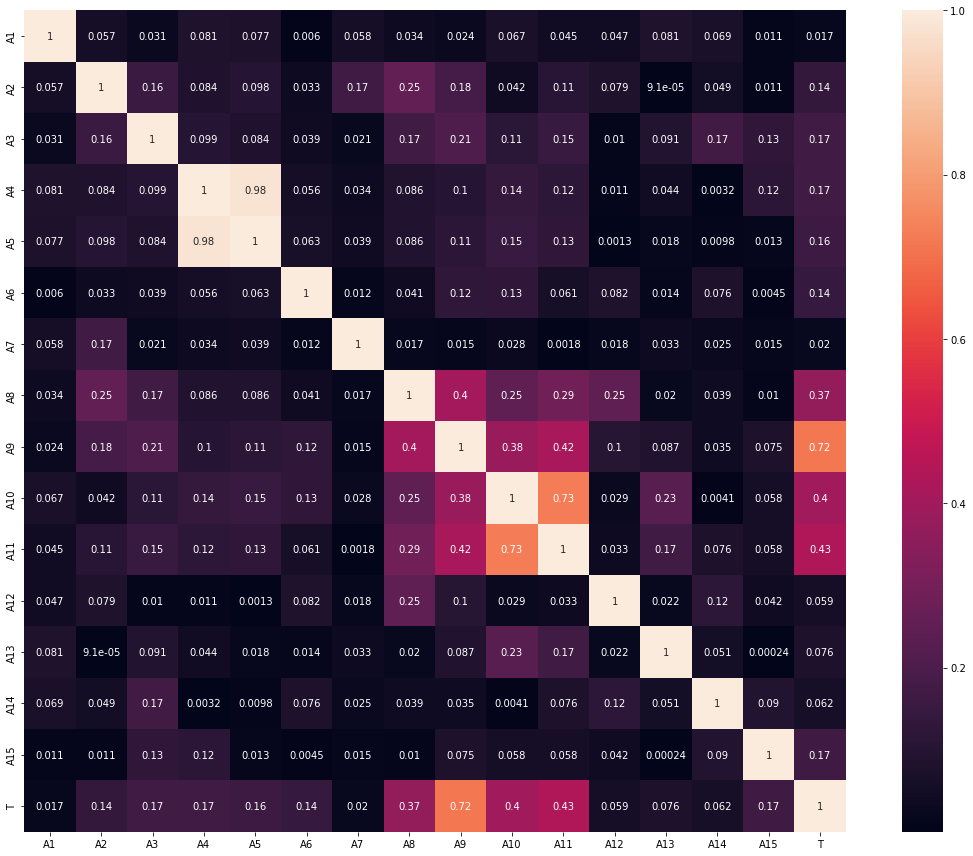

In [15]:
corr = new_data.corr().abs()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, square=True, annot=True)
plt.tight_layout()
#in the graph below you can see that the correlation is a bit higher foir A8 and A11

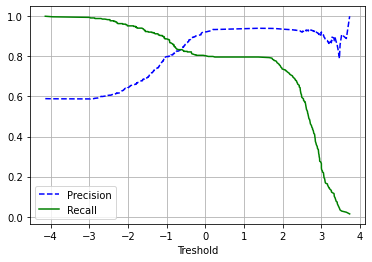

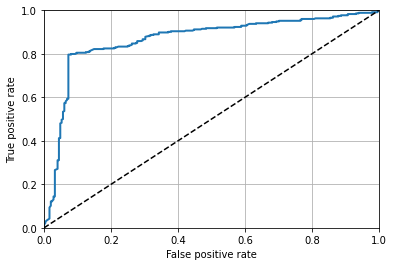

Mean: 0.6759037909252978
Standard deviation: 2.2093286398240264


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.grid()
    plt.xlabel(xlabel="Treshold")
    plt.legend(loc='best')

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.grid()
    plt.ylim(bottom = 0, top = 1) 
    plt.xlim(left = 0, right = 1)
    plt.xlabel(xlabel="False positive rate")
    plt.ylabel(ylabel="True positive rate")

def display_scores(scores):
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


log_reg = LogisticRegression(solver="lbfgs",C=10, max_iter=1000, random_state=42)

X = new_data[['A8', 'A9' , 'A10' , 'A11']]
y = new_data['T']

y_scores = cross_val_predict(log_reg, X, y, cv=5,
method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

fpr, tpr, thresholds = roc_curve(y, y_scores)
plot_roc_curve(fpr, tpr)
plt.show()

display_scores(y_scores)

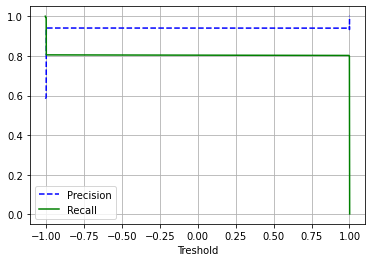

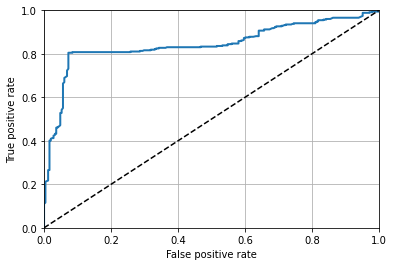

Mean: 0.0032029000801490955
Standard deviation: 1.0000187634369189


In [17]:
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


poly_kernel_svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=2, coef0=1, C=5))
])


y_scores = cross_val_predict(poly_kernel_svm_clf, X, y, cv=5,
method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

fpr, tpr, thresholds = roc_curve(y, y_scores)
plot_roc_curve(fpr, tpr)
plt.show()

display_scores(y_scores)

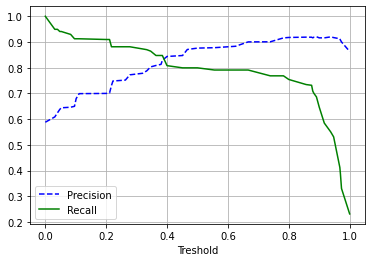

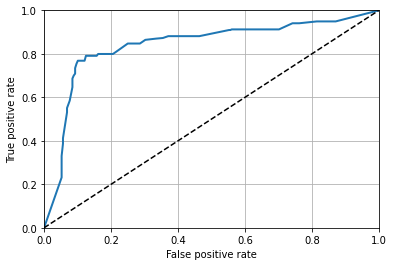

Mean: 0.5769063154808479
Standard deviation: 0.39400828225716095


In [18]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X, y)

y_scores = cross_val_predict(tree_clf, X, y, cv=5,
method="predict_proba")
y_scores = y_scores[:,1]


precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


fpr, tpr, thresholds = roc_curve(y, y_scores)
plot_roc_curve(fpr, tpr)
plt.show()

display_scores(y_scores)


The decision tree classifier yields the best result when looking at the ROC curve. 
The logistic regresion is in this case better then the SVM when loooking at the ROC curve.



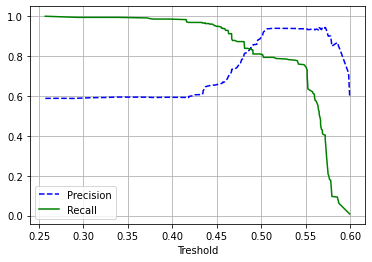

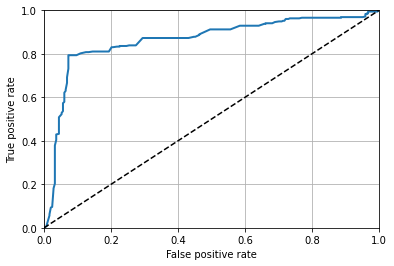

Mean: 0.5769063154808479
Standard deviation: 0.39400828225716095


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier


ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5,  max_leaf_nodes=16), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.8, random_state=42)

pipe_ada = Pipeline([ ("std_scaler", MinMaxScaler()),
                     ("clf", ada_clf)])

params = {
    'clf__base_estimator__max_depth': range(1, 6),
    'clf__base_estimator__criterion': ['gini', 'entropy'],
    'clf__base_estimator__max_features': ['sqrt', 'log2', None],
    'clf__base_estimator__max_leaf_nodes': [10, 20, None],
    'clf__learning_rate': [0.2, 0.5, 1.0],
    'clf__n_estimators': [50, 100, 200, 500]
}

clf = GridSearchCV(pipe_ada, params, cv=5, scoring="roc_auc", n_jobs=-3)
clf.fit(X, y)


best_ada = clf.best_estimator_

pipe_ada.fit(X, y)
y_pred = cross_val_predict(best_ada, X, y, cv=5)

y_scores_ada = cross_val_predict(best_ada, X, y, cv=5, method="predict_proba")
y_scores_ada = y_scores_ada[:,1]

precisions, recalls, thresholds = precision_recall_curve(y, y_scores_ada)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


fpr, tpr, thresholds = roc_curve(y, y_scores_ada)
plot_roc_curve(fpr, tpr)
plt.show()

display_scores(y_scores)

Since the decision tree classifier had the best result when comparing the 3 different classifiers, the tree classieifer was improved by using grid search. The results shown in the graphs above show some imporovement when the grid search was used.
    